<a href="https://colab.research.google.com/github/ramsoi53/ramsoi/blob/main/My_Titanic_ver2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/files")


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [3]:
# Read data

data = pd.read_csv('ttn_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Text(0.5, 1.0, 'Survived')

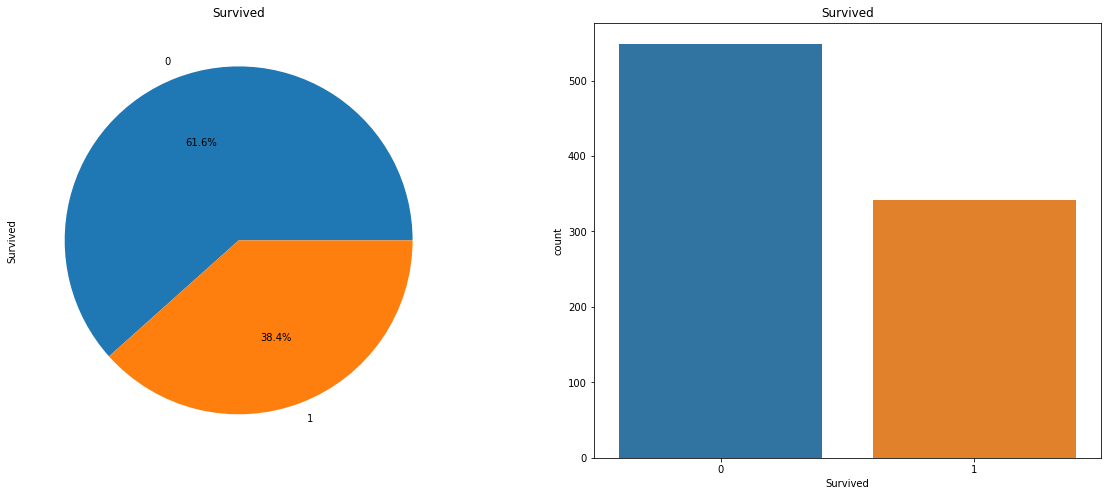

In [5]:
fig, ax = plt.subplots(1,2, figsize=(20,8))
data['Survived'].value_counts().plot.pie(ax=ax[0], autopct='%1.1f%%')
ax[0].set_title('Survived')

sns.countplot(data['Survived'], data=data, ax=ax[1])
ax[1].set_title('Survived')



In [6]:
data.groupby(['Sex','Survived'])['Sex'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Sex, dtype: int64

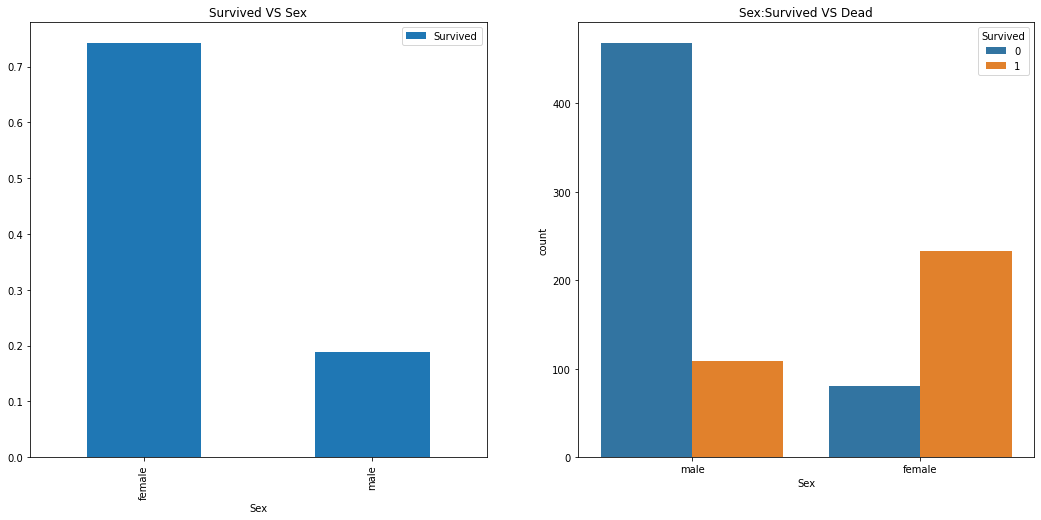

In [7]:
fig,ax = plt.subplots(1,2, figsize=(18,8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived VS Sex')

sns.countplot(data['Sex'], data=data, hue='Survived')
ax[1].set_title('Sex:Survived VS Dead')
plt.show()



In [8]:
pd.crosstab(data['Pclass'], data['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


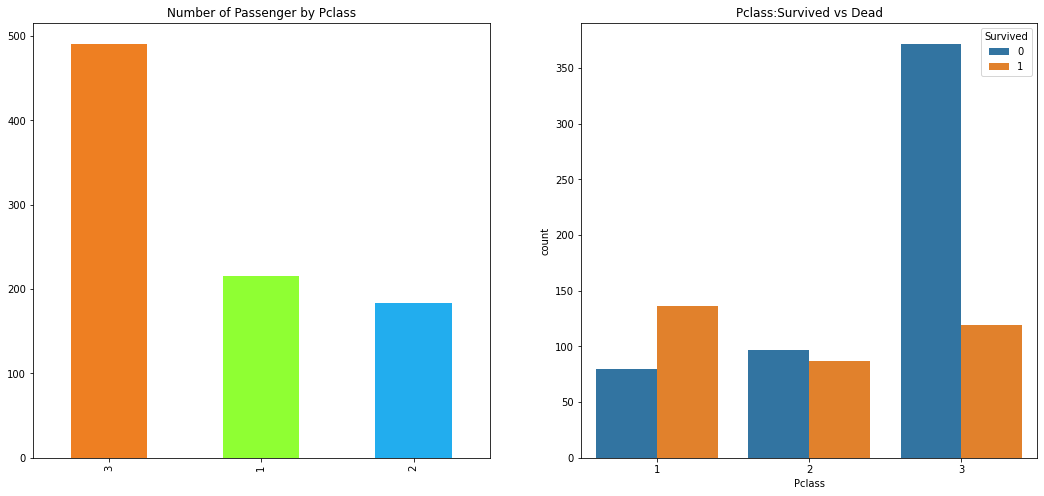

In [9]:
fig, ax = plt.subplots(1,2, figsize=(18,8))

data['Pclass'].value_counts().plot.bar(color=['#EE7F22', '#8FFF33', '#22ADEE'],ax=ax[0])
ax[0].set_title('Number of Passenger by Pclass')

sns.countplot('Pclass', data=data, hue='Survived', ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')

plt.show()



In [10]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True)

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

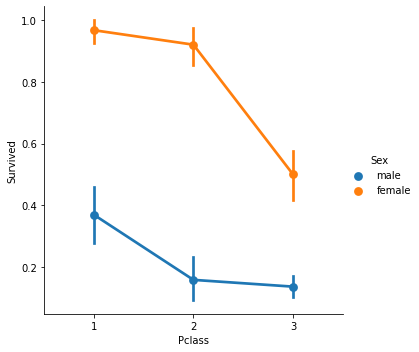

In [11]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)

In [12]:
print('Oldest Passenger was of: {}'.format(data.Age.max()))

Oldest Passenger was of: 80.0


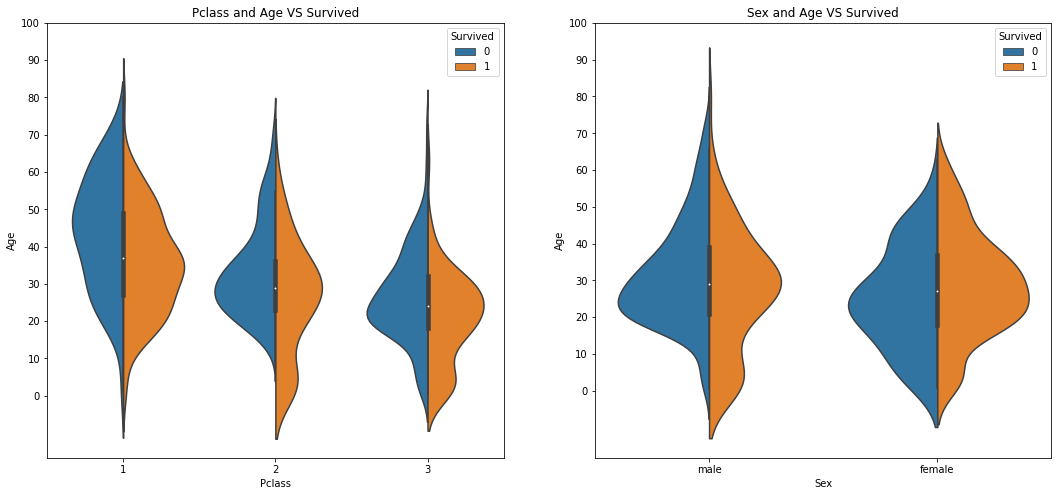

In [13]:
fig,ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age",hue="Survived",data=data,split=True, ax=ax[0])
ax[0].set_title('Pclass and Age VS Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age",hue="Survived",data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age VS Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [14]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')

In [16]:
pd.crosstab(data.Initial, data.Sex).T


Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [17]:
data.Initial.replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [18]:
pd.crosstab(data.Initial, data.Sex).T

Initial,Master,Miss,Mr,Mrs,Other
Sex,,,,,
female,0,186,1,127,0
male,40,0,528,0,9


In [19]:
data.groupby(['Initial'])['Age'].mean()


Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [20]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46


In [21]:
data.Age.isnull().sum()


0

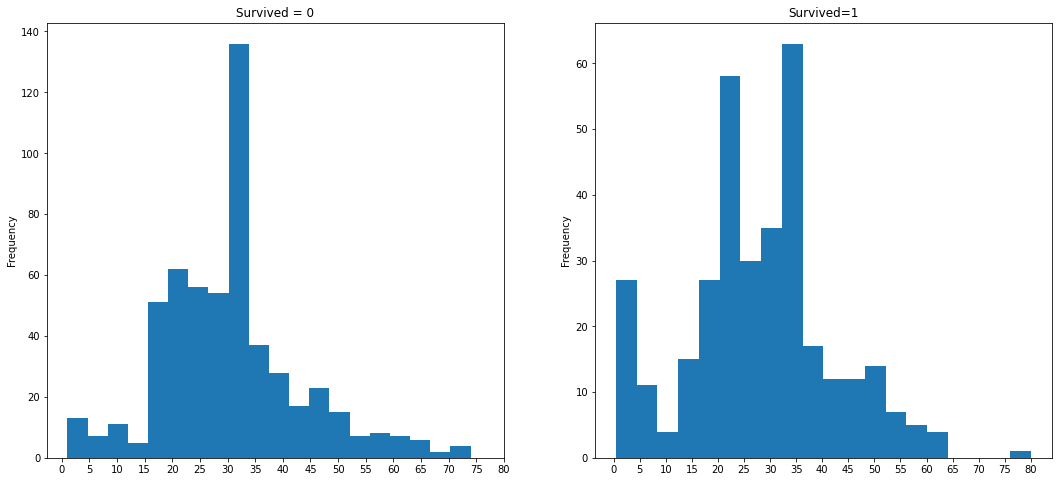

In [22]:
f, ax = plt.subplots(1,2, figsize=(18,8))
data[data['Survived'] == 0].Age.plot.hist(ax=ax[0], bins=20)
ax[0].set_title('Survived = 0')
x1 = list(range(0,85,5))
ax[0].set_xticks(x1)

data[data['Survived'] == 1].Age.plot.hist(ax=ax[1], bins=20)
ax[1].set_title('Survived=1')
x2 = list(range(0,85,5))
ax[1].set_xticks(x1)

plt.show()


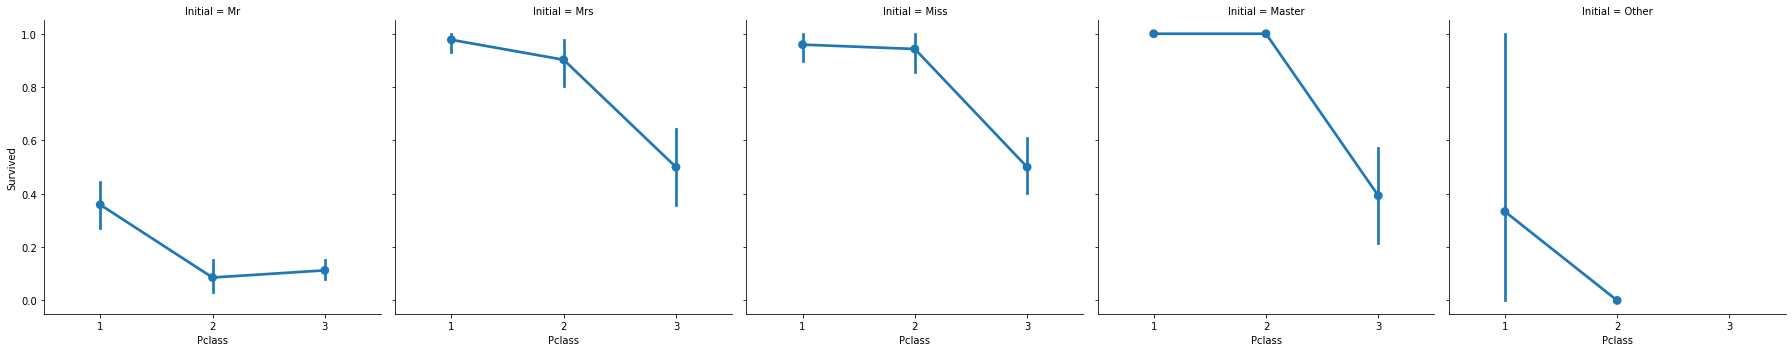

In [23]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=data)

In [24]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

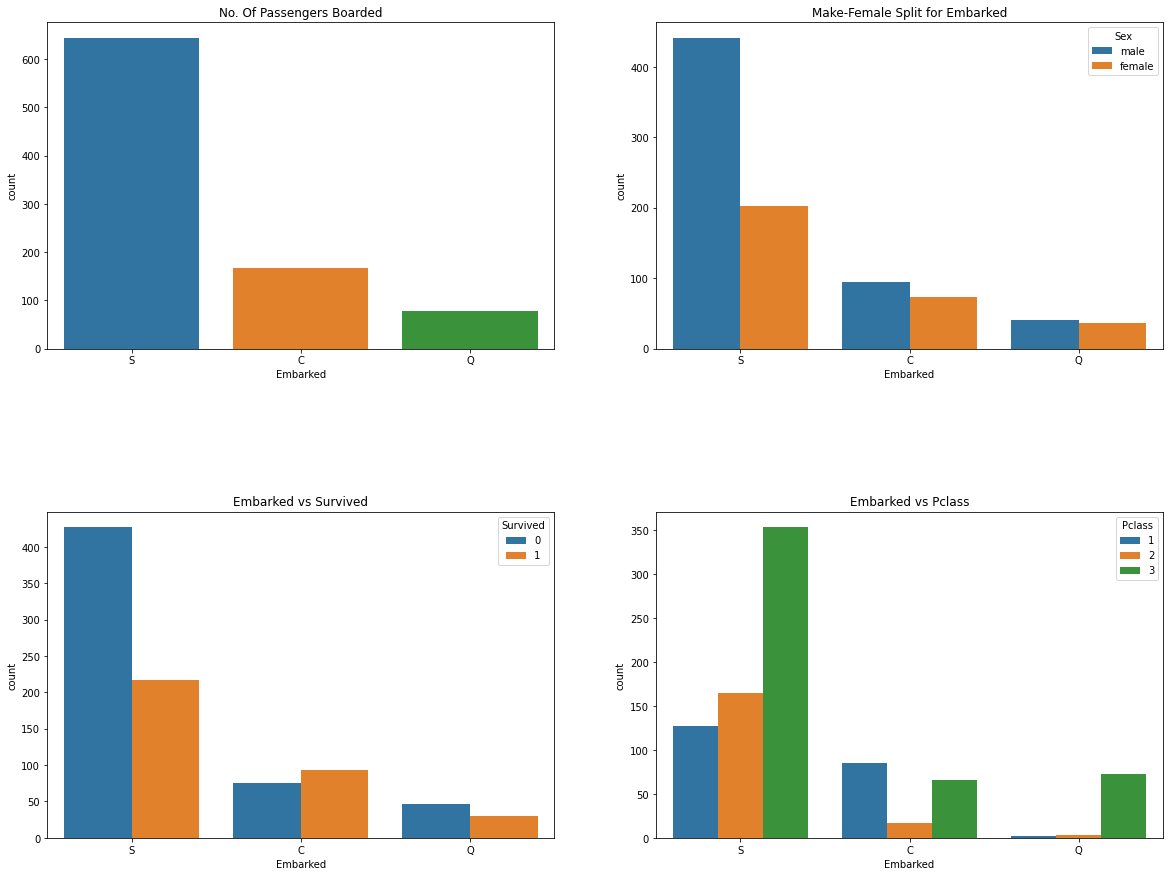

In [25]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Make-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)

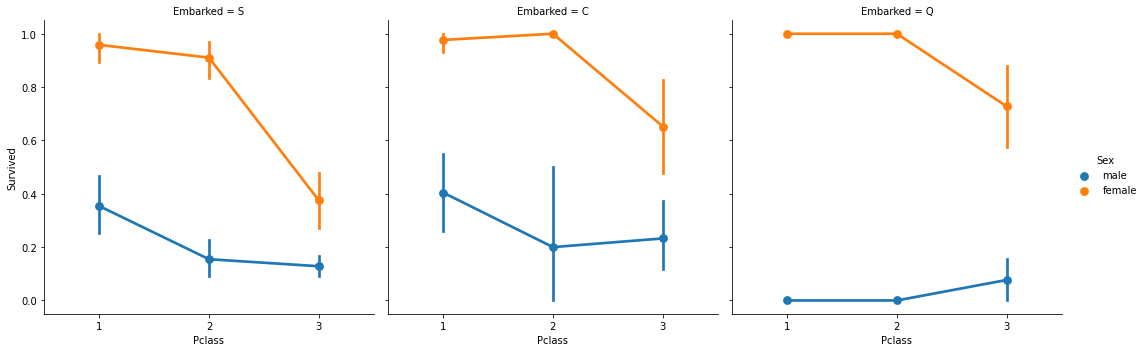

In [26]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col = 'Embarked', data=data)

In [27]:
data.Embarked.fillna('S', inplace=True)

In [28]:
data.Embarked.isnull().any()

False

In [29]:
pd.crosstab([data.SibSp, data.Parch], data.Survived, margins=True)

Survived       0    1  All
SibSp Parch               
0     0      374  163  537
      1       13   25   38
      2        8   21   29
      3        0    1    1
      4        1    0    1
      5        2    0    2
1     0       59   64  123
      1       23   34   57
      2        7   12   19
      3        2    1    3
      4        3    0    3
      5        2    1    3
      6        1    0    1
2     0       12    4   16
      1        1    6    7
      2        2    2    4
      3        0    1    1
3     0        0    2    2
      1        7    0    7
      2        5    2    7
4     1        9    0    9
      2        6    3    9
5     2        5    0    5
8     2        7    0    7
All          549  342  891

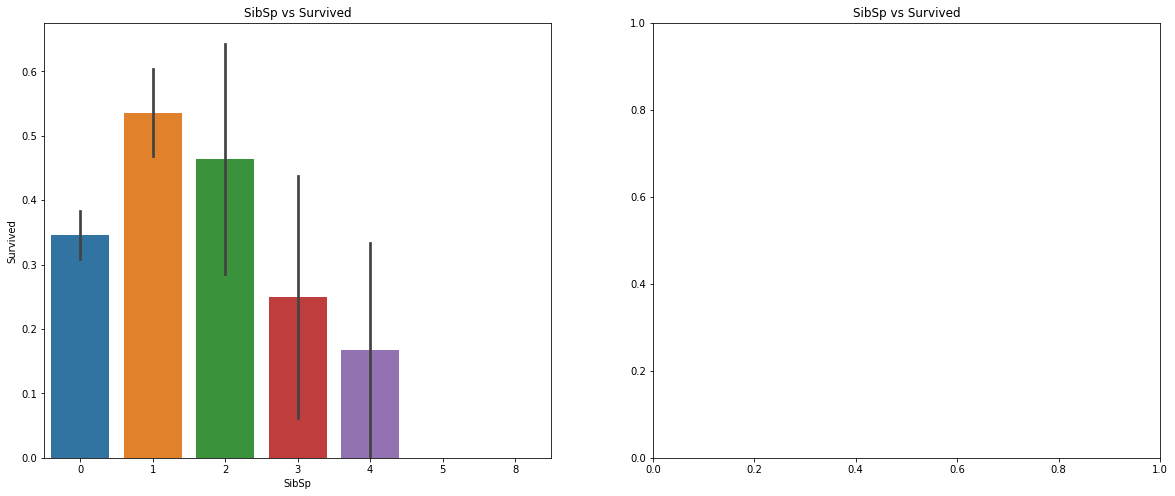

In [30]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [31]:
pd.crosstab(data.Pclass, data.SibSp, margins=True).T

Pclass,1,2,3,All
SibSp,,,,
0,137,120,351,608
1,71,55,83,209
2,5,8,15,28
3,3,1,12,16
4,0,0,18,18
5,0,0,5,5
8,0,0,7,7
All,216,184,491,891


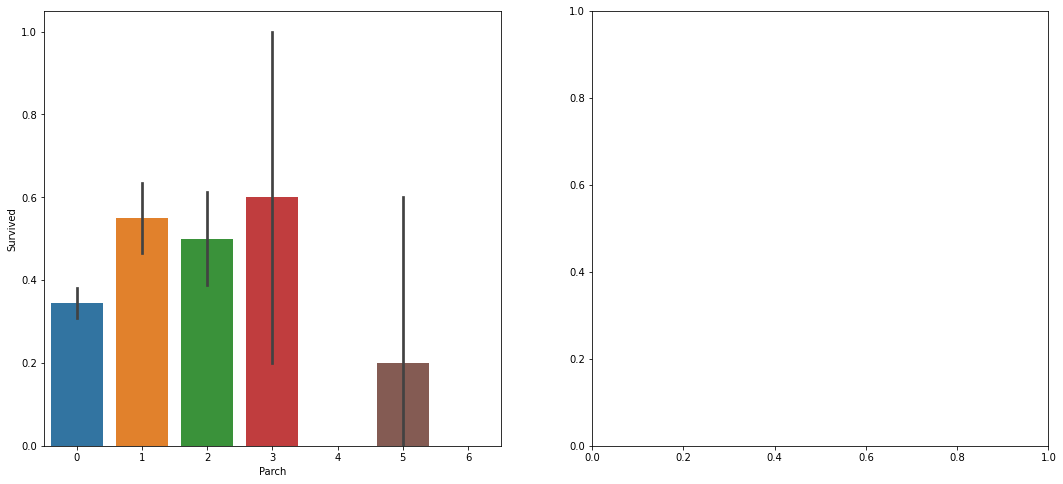

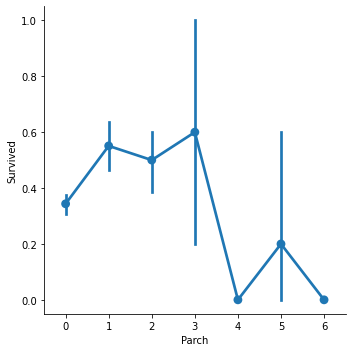

In [32]:
f,ax = plt.subplots(1,2, figsize=(18,8))
sns.barplot('Parch', 'Survived', data=data, ax=ax[0])
sns.factorplot('Parch', 'Survived', data=data, ax=ax[1])

In [33]:
print('Highest Fare was : {}'.format(data.Fare.max()))

Highest Fare was : 512.3292


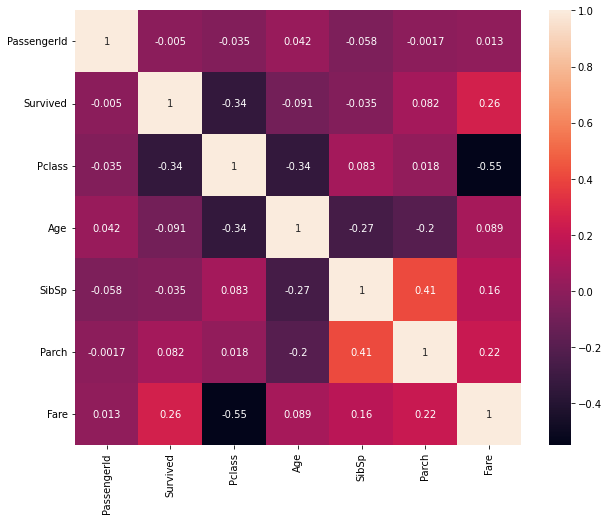

In [34]:
sns.heatmap(data.corr(),annot=True)
fig = plt.gcf()
fig.set_size_inches(10,8)


In [35]:
# 나이를 구간으로 나누어서 16세 이하, 32세 이하, 48세 이하, 64세 이하, 이상으로 구분한다.


In [36]:
data['Age_band'] = 0

data.loc[data.Age <=16, 'Age_band'] =0
data.loc[(data.Age>16) & (data.Age <=32), 'Age_band'] = 1
data.loc[(data.Age>32) & (data.Age <=48), 'Age_band'] = 2
data.loc[(data.Age>48) & (data.Age <=64), 'Age_band'] = 3
data.loc[data.Age >64, 'Age_band'] =5

data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


In [37]:
data.Age_band.value_counts().to_frame().T


,1,2,0,3,5
Age_band,382,325,104,69,11


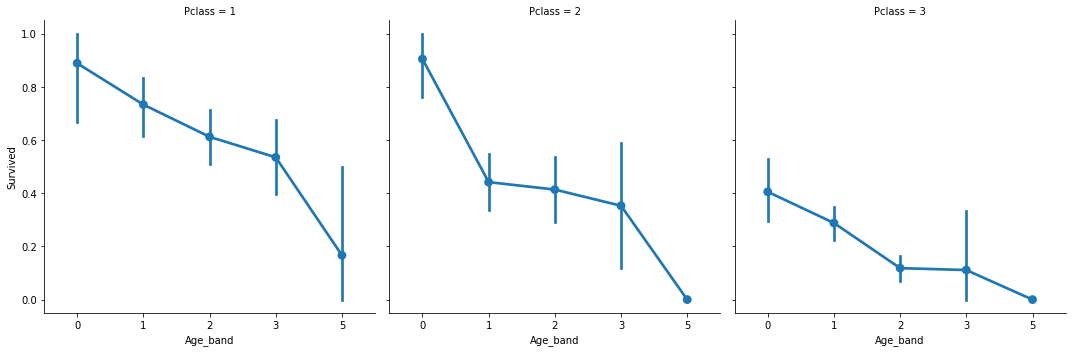

In [38]:
sns.factorplot('Age_band', 'Survived', data=data, col='Pclass')

In [43]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp']
data['Alone'] = 0
data.loc[data.Family_Size==0, 'Alone'] = 1


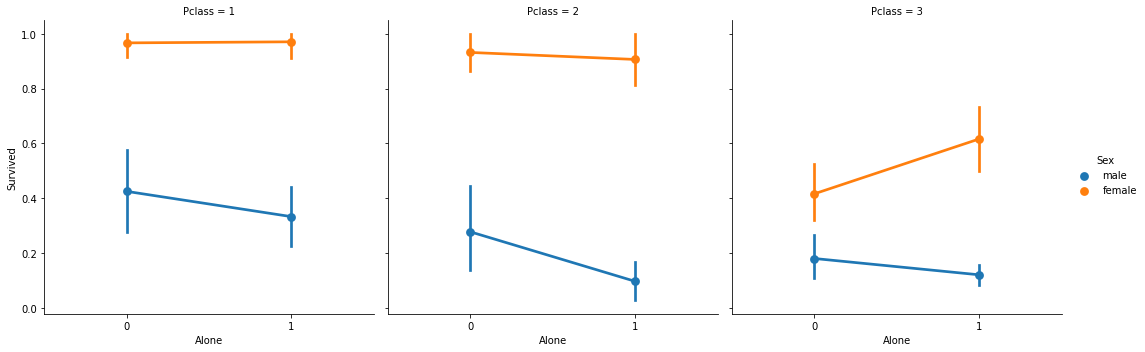

In [47]:
sns.factorplot('Alone','Survived', data=data, hue='Sex', col='Pclass')

In [54]:
data['Fare_Range'] = pd.qcut(data['Fare'],4)
data.groupby('Fare_Range')['Survived'].mean().to_frame()
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3



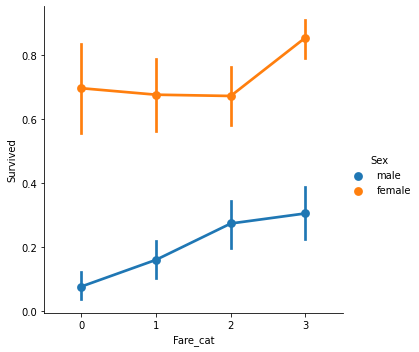

In [55]:
sns.factorplot('Fare_cat','Survived',data=data,hue='Sex')
plt.show()

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     891 non-null    object  
 12  Initial      891 non-null    object  
 13  Age_band     891 non-null    int64   
 14  Family_Size  891 non-null    int64   
 15  Alone        891 non-null    int64   
 16  Fare_Range   891 non-null    category
 17  Fare_cat     891 non-null    int64   
dtypes: category(1), float64(2), in

In [59]:
data.Sex.replace({'male':0 , 'female':1}, inplace=True)
data.Embarked.replace(['S','Q','C'], [0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    int64   
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     891 non-null    int64   
 12  Initial      891 non-null    int64   
 13  Age_band     891 non-null    int64   
 14  Family_Size  891 non-null    int64   
 15  Alone        891 non-null    int64   
 16  Fare_Range   891 non-null    category
 17  Fare_cat     891 non-null    int64   
dtypes: category(1), float64(2), in

In [61]:
data.drop(['Name', 'Age','Ticket','Fare', 'Cabin', 'Fare_Range' ,'PassengerId'], axis=1, inplace=True)

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Survived     891 non-null    int64
 1   Pclass       891 non-null    int64
 2   Sex          891 non-null    int64
 3   SibSp        891 non-null    int64
 4   Parch        891 non-null    int64
 5   Embarked     891 non-null    int64
 6   Initial      891 non-null    int64
 7   Age_band     891 non-null    int64
 8   Family_Size  891 non-null    int64
 9   Alone        891 non-null    int64
 10  Fare_cat     891 non-null    int64
dtypes: int64(11)
memory usage: 76.7 KB


In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix


In [72]:
train, test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]

In [73]:
train_X.head()

,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat
231,3,0,0,0,0,0,1,0,1,0
836,3,0,0,0,0,0,1,0,1,1
639,3,0,1,0,0,0,2,1,0,2
389,2,1,0,0,2,2,1,0,1,1
597,3,0,0,0,0,0,3,0,1,0


In [74]:
train_Y.head()


,Survived
231,0
836,0
639,0
389,1
597,0
